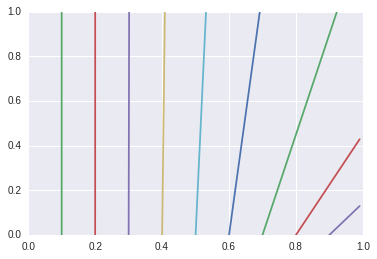

In [20]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.ylim([0, 1])

def a_coef(u):
    return (1+(1+u**8)**2)/(4*u**6)

for u in np.arange(0, 1.5, 0.1):
    x = np.arange(0, 1, 0.01)
    t = a_coef(u)*(x-u)
    # sns.pairplot(data=[x, t])
    plt.plot(x, t)
# u=0.9
# x = np.arange(0, 1, 0.01)
# t = a_coef(u)*(x-u)
# # sns.pairplot(data=[x, t])
# plt.plot(x, t)

plt.show()

In [21]:
def itan(x, i, j):
    return np.arctan(x[i][j] ** 4 + 1)

class Newton():
    def __init__(self):
        self.x_min = 0
        self.x_max = 1
        self.t_max = 1
        self.grid = 100
        self.eps = 0.001

        self.hx = (self.x_max - self.x_min) / self.grid
        self.tau = self.t_max / self.grid


    def ff(self, x, i, j):
        return (x[i][j + 1] - x[i][j] + x[i + 1][j + 1] - x[i + 1][j]) / (2 * self.tau) + (
            itan(x, i + 1, j) - itan(x, i, j) + itan(x, i + 1, j + 1) - itan(x, i, j + 1))/(2 * self.hx)
    
    def fder(self, x, i, j):
        return 1/(2*self.tau) + 1/(2*self.tau)*4*x[i][j]**3/(1+(1+x[i][j]**4)**2)
    
    def iter(self, x, i, j):
        dy = 10*self.eps
        while dy>self.eps:
            dy = -self.ff(x, i, j)/self.fder(x, i, j)
            x[i+1][j+1] = x[i+1][j+1] + dy

In [22]:
from tqdm import tqdm_notebook as tqdm

u = np.zeros((101,101))
u[:, 0] = np.arange(0, 1.01, 0.01)**2
newton = Newton()
for i in tqdm(range(100)):
    for j in range(100):
        newton.iter(u, i, j)

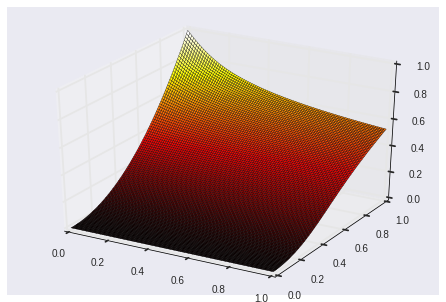

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

x = np.arange(0,1.01,0.01)
y = np.arange(0,1.01,0.01)

xs, ys = np.meshgrid(x, y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, u, rstride=1, cstride=1, cmap='hot')
plt.show()

In [26]:
import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
data = [
    go.Surface(
        z=u
    )
]
layout = go.Layout(
    title='Omm',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
    
iplot(fig, filename='elevations-3d-surface')

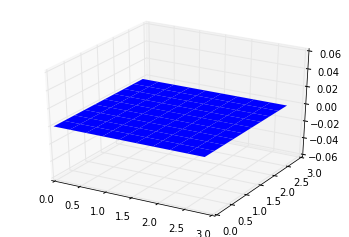

In [8]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import math
import matplotlib.pylab as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation, rc
import matplotlib
from IPython.display import HTML

pi=math.pi
x=pi
y=pi
t=0.3

Nx=10
Ny=10
def F(m,n,k,s):
    a=0
    if s==1:
        a=(U[m,n-1,k]+U[m,n+1,k])*dt/(dy**2*2)+(1-dt/(dy**2))*U[m,n,k]+dy*n*(dt*k*2)**2 + dt/2*math.sin(pi*dx*m)*math.sin(pi*dy*n)*math.exp(-k)
    if s==2:
        a=(U[m,n-1,k+1]+U[m,n+1,k+1])*dt/(dx**2*2)+(1-dt/(dx**2))*U[m,n,k+1]+dy*n*(dt*k*2)**2 + dt/2*math.sin(pi*dx*m)*math.sin(pi*dy*n)*math.exp(-k)
    return a

dt=0.01
dx=x/Nx
dy=y/Ny
Nt=math.trunc(t/dt)

A1=dt/(2*dx**2)
C1=A1
B1=A1*2+1
A2=dt/(2*dy**2)
C2=A2
B2=A2*2+1

dm=np.zeros(Nx)
sm=np.zeros(Nx)
sm2=np.zeros(Nx)
dn=np.zeros(Ny)
sn=np.zeros(Ny)
sn2=np.zeros(Ny)
U=np.zeros((Nx,Ny,2*Nt))

dm[0]=0
sm[0]=dn[0]=sn[0]=0

# sm2 = (sm[1]-sm[0])/dx 
# sn2 = (sn[0]-sn[1])/dy

for k in range (0,2*Nt-3,2):
    for n in range(1,Ny-1):
        for m in range (Nx-1):
            dm[m+1]=C1/(B1-A1*dm[m])
            sm[m+1]=(F(m,n,k,1)+A1*sm[m])/(B1-A1*dm[m])
        U[m,Nx-1,k + 2] = 0
        for m in range(Nx-1,1,-1):
            U[m-1,n,k+1]=dm[m]*U[m,n,k+1]+sm[m]
#   НУ
    for n in range (Ny):
        U[0,n,k+1]=U[1,n,k+1] # -U[0, n, k+1]/dx
        U[Nx-1,n,k+1]=0
    for m in range (Nx):
        U[m,0,k+1]=U[m,1,k+1]
        U[m,Ny-1,k+1]=U[m,Ny-2,k+1]
    #второй слой
    for m in range (Nx-1):
        for n in range (Ny-1):
            dn[n+1]=C2/(B2-A2*dn[n])
            sn[n+1]=(F(m,n,k,2)+A2*sn[n])/(B2-A2*dn[n])
        
        for n in range (Ny-1,1,-1):
            U[m,n-1,k+2]=dn[n]*U[m,n,k+2]+sn[n]
#   НУ
    for n in range (Ny):
        U[0,n,k+2]=U[1,n,k+2]
        U[Nx-1,n,k+2]=0
    for m in range (Nx):
        U[m,0,k+2]=U[m,1,k+2]
        U[m,Ny-1,k+2]=U[m,Ny-2,k+2]

tt=np.arange(0,x,dx)
xx=np.arange(0,y,dy)
fig = plt.figure()
X, Y = np.meshgrid(tt, xx)
tt2=U[:,:,0]
ax = fig.gca(projection='3d')
plot_args = {'rstride': 1, 'cstride': 1, 'cmap':
             cm.bwr, 'linewidth': 0.01, 'antialiased': True, 'color': 'w',
             'shade': True}
plot = ax.plot_surface(X, Y, tt2, **plot_args)
def animate(framenumber): 
    ax.clear()
    if framenumber<60:
        return ax.plot_surface(X, Y, U[:,:,framenumber], **plot_args)

pam_ani = animation.FuncAnimation(fig, animate,
                              interval=1, blit=False)
HTML(pam_ani.to_html5_video())